In [35]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
import cftime 
import psutil
import xesmf as xe
from tqdm import tqdm
from fire import Fire

In [45]:
from src.global_regridding import regrid_ds, convert_calendar

## Load CMIP models

In [46]:
models = ['MIROC6', 'MPI-ESM1-2-LR','EC-Earth3', 'CanESM5']

In [47]:
url = 'https://storage.googleapis.com/cmip6/pangeo-cmip6.json'
raw_cat = intake.open_esm_datastore(url)

In [53]:
def load_global_mean(model):
    cat = raw_cat.search(
            experiment_id='historical',
            table_id='Amon',
            variable_id= 'tas',
            source_id = model
    )
    dsets = cat.to_dataset_dict(zarr_kwargs={'consolidated':True}, storage_options={"anon": True})
    ds = list(dsets.values())[0].tas
    monthly = ds.sel(time=slice('1980', '2014')).mean(('member_id')).compute()
    monthly = regrid_ds(monthly, 2.5)
    monthly = convert_calendar(monthly, 'monthly')
#     annual = ds.sel(time=slice('1980', '2014')).mean(('member_id')).resample(time='AS').mean().compute()
#     weights_lat = np.cos(np.deg2rad(annual.lat))
#     weights_lat /= weights_lat.mean()
#     mean = (annual * weights_lat).mean(('lat', 'lon'))
    return monthly

In [54]:
# means = []
# for model in models:
#     print(model)
#     mean = load_global_mean(model)
#     means.append(mean)
dsets = []
for model in models:
    print(model)
    mean = load_global_mean(model)
    dsets.append(mean)

MIROC6

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/opt/conda/envs/analogs/lib/python3.9/site-packages/xesmf/frontend.py:522: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


MPI-ESM1-2-LR

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/opt/conda/envs/analogs/lib/python3.9/site-packages/xesmf/frontend.py:522: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


EC-Earth3

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/indexing.py:1232: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[k

/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/opt/conda/envs/analogs/lib/python3.9/site-packages/xesmf/frontend.py:522: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


CanESM5

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/opt/conda/envs/analogs/lib/python3.9/site-packages/xesmf/frontend.py:522: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


In [65]:
# for i in range(len(means)):
#     mean = means[i]
#     means[i] = mean.assign_coords(time=mean.time.values.astype('datetime64[Y]'))

In [55]:
monthly_means = xr.concat(dsets, dim=models).rename({'concat_dim': 'model'})

In [56]:
monthly_means

<xarray.DataArray 'tas' (model: 4, time: 420, lat: 71, lon: 144)>
array([[[[259.56627823, 259.43284138, 259.29838214, ..., 259.97350492,
          259.83756796, 259.70148612],
         [260.597692  , 260.45914468, 260.31457825, ..., 261.03013427,
          260.87919464, 260.73581787],
         [262.11786957, 261.77016952, 261.44835498, ..., 263.24270897,
          262.83599565, 262.46657928],
         ...,
         [247.70011204, 248.22377715, 248.59151935, ..., 245.99260789,
          246.560343  , 247.16062326],
         [244.78234443, 244.9205877 , 245.03702219, ..., 244.27650792,
          244.4526585 , 244.62237118],
         [242.91228147, 242.96436871, 243.02792099, ..., 242.76839167,
          242.81794678, 242.86146121]],

        [[243.27551604, 243.09329157, 242.91481492, ..., 243.86020985,
          243.65889835, 243.46479754],
         [244.35184745, 244.06847315, 243.81660494, ..., 245.39831175,
          245.02088674, 244.6712003 ],
         [247.19423481, 246.73794961, 246.3569667 , ..., 248.91666311,
          248.26641814, 247.6969062 ],
...
         [253.20890318, 253.73499315, 254.19913389, ..., 251.33795398,
          251.98330334, 252.62078433],
         [251.44614005, 251.71715398, 251.97745077, ..., 250.48751784,
          250.8230422 , 251.14851485],
         [250.54825924, 250.63892177, 250.72008847, ..., 250.23060293,
          250.34251719, 250.44121709]],

        [[251.63046332, 251.4526658 , 251.27939954, ..., 252.20154852,
          252.00364676, 251.81360281],
         [251.58991439, 251.23299217, 250.90149487, ..., 252.86225042,
          252.39972783, 251.97418834],
         [250.94703721, 250.5143537 , 250.10626714, ..., 252.56530172,
          251.95572439, 251.42336874],
         ...,
         [248.82821212, 249.31391154, 249.74395065, ..., 247.11347647,
          247.71331337, 248.29416917],
         [247.48350485, 247.75347584, 248.01816154, ..., 246.50065157,
          246.84527523, 247.17754714],
         [246.51502228, 246.61720868, 246.71481892, ..., 246.17221321,
          246.28969372, 246.3996389 ]]]])
Coordinates:
    height   float64 2.0
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2014-12-01
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -87.5 -85.0 -82.5 -80.0 -77.5 ... 80.0 82.5 85.0 87.5
  * model    (model) <U13 'MIROC6' 'MPI-ESM1-2-LR' 'EC-Earth3' 'CanESM5'
Attributes:
    regrid_method:  bilinear

## Load CESM-LENS

In [57]:
url = "https://raw.githubusercontent.com/NCAR/cesm-lens-aws/main/intake-catalogs/aws-cesm1-le.json"
raw_cat = intake.open_esm_datastore(url)

In [58]:
frequency = 'monthly'

In [59]:
cat = raw_cat.search(
    experiment=['RCP85','20C'],
    variable=['TREFHT'],
    frequency=frequency
)

In [60]:
dsets = cat.to_dataset_dict(
zarr_kwargs={'consolidated':True}, storage_options={"anon": True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'


In [61]:
keys = sorted(dsets.keys())
hist = dsets[keys[0]]
future = dsets[keys[1]]
ds = xr.concat([hist, future], 'time')

In [62]:
%%time
# annual = ds['TREFHT'].sel(time=slice('1980', '2014')).mean(('member_id')).resample(time='AS').mean().compute()
monthly = ds['TREFHT'].sel(time=slice('1980', '2014')).mean(('member_id')).compute()

CPU times: user 26.2 s, sys: 9.38 s, total: 35.6 s
Wall time: 40.2 s


In [63]:
# annual = annual.assign_coords(time=mean.time.values.astype('datetime64[Y]'))

In [64]:
# weights_lat = np.cos(np.deg2rad(annual.lat))
# weights_lat /= weights_lat.mean()
# mean = (annual * weights_lat).mean(('lat', 'lon'))

In [65]:
monthly = regrid_ds(monthly, 2.5)
monthly = convert_calendar(monthly, 'monthly')

/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/opt/conda/envs/analogs/lib/python3.9/site-packages/xesmf/frontend.py:522: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


In [66]:
all_means = xr.concat([monthly_means, monthly.expand_dims('model').assign_coords(model=['cesm_lens'])], dim='model')

## Load ERA

In [67]:
era = xr.open_zarr('gcs://era_5_bucket/monthly/t2m_1979_2021_global.zarr', consolidated=True).t2m_monthly_mean

In [68]:
# weights_lat = np.cos(np.deg2rad(era.latitude))
# weights_lat /= weights_lat.mean()

In [70]:
monthly_era = regrid_ds(era.sel(time=slice('1980', '2014')).load(), 2.5)
monthly_era = convert_calendar(monthly_era, 'monthly')

/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


In [71]:
# %%time
# monthly_era = (era.resample(time='AS').mean() * weights_lat).mean(('latitude', 'longitude')).compute()

In [72]:
# mean_era = mean_era.sel(time=slice('1980', '2014'))

## Compute weights

In [73]:
all_means = xr.concat([all_means, monthly_era.expand_dims('model').assign_coords(model=['ERA'])], dim='model')

In [74]:
# all_means = all_means.assign_coords(time=all_means.time.dt.year.values)

In [81]:
weights_lat = np.cos(np.deg2rad(all_means.lat))
weights_lat /= weights_lat.mean()
global_mean = (all_means.resample(time='AS').mean() * weights_lat).mean(('lat', 'lon'))

In [88]:
global_mean = global_mean.assign_coords(time=global_mean.time.dt.year.values)

In [89]:
coeffs = global_mean.polyfit('time', 1)
fit = xr.polyval(global_mean.time, coeffs)['polyfit_coefficients']

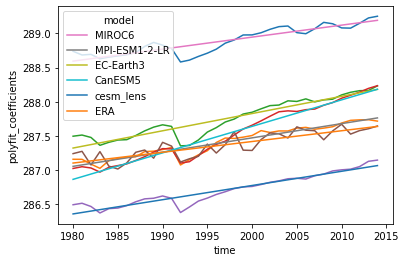

In [90]:
global_mean.plot(hue='model');
fit.plot(hue='model');

In [131]:
slope = coeffs['polyfit_coefficients'].sel(degree=1) * 10

In [132]:
slope

<xarray.DataArray 'polyfit_coefficients' (model: 6)>
array([0.17535474, 0.20822475, 0.2522159 , 0.3874309 , 0.20780388,
       0.15745466])
Coordinates:
    degree   int64 1
  * model    (model) object 'MIROC6' 'MPI-ESM1-2-LR' ... 'cesm_lens' 'ERA'

In [154]:
weights = 1 / (np.abs(slope - slope.sel(model='ERA')) + slope.sel(model='ERA'))

In [155]:
weights

<xarray.DataArray 'polyfit_coefficients' (model: 6)>
array([55.86568028, 19.69663531, 10.55283784,  4.34827527, 19.86127985,
               inf])
Coordinates:
    degree   int64 1
  * model    (model) object 'MIROC6' 'MPI-ESM1-2-LR' ... 'cesm_lens' 'ERA'

In [152]:
weights.isel(model=slice(0, 5)).to_netcdf('model_weights.nc')

In [153]:
weights

<xarray.DataArray 'polyfit_coefficients' (model: 6)>
array([5.70272595, 4.80250305, 3.96485713, 2.58110544, 4.81222967,
       6.35103473])
Coordinates:
    degree   int64 1
  * model    (model) object 'MIROC6' 'MPI-ESM1-2-LR' ... 'cesm_lens' 'ERA'

In [ ]:
x = np.array([0.17533472, 0.20824571, 0.25359439, 0.38742816, 0.20780065,
       0.15744717])

In [4]:
ref = 0.15744717

In [25]:
err = np.abs(x - ref)

In [26]:
err

array([0.01788755, 0.05079854, 0.09614722, 0.22998099, 0.05035348,
       0.        ])

In [34]:
i = np.exp(-err**2/np.var(err)/2)[:-1]
i / i.mean()

array([1.6037062 , 1.31783614, 0.73877791, 0.01668098, 1.32299878])

In [13]:
x / ref

array([1.11360985, 1.32263863, 1.61066337, 2.46068672, 1.31981191,
       1.        ])

In [7]:
err

array([0.01788755, 0.05079854, 0.09614722, 0.22998099, 0.05035348,
       0.        ])

In [10]:
err / ref

array([0.11360985, 0.32263863, 0.61066337, 1.46068672, 0.31981191,
       0.        ])

In [8]:
weights = ref / err

/tmp/ipykernel_28724/1024297317.py:1: RuntimeWarning: divide by zero encountered in true_divide
  weights = ref / err


In [9]:
weights

array([8.80205338, 3.09944282, 1.63756342, 0.6846095 , 3.12683791,
              inf])

## Annual cycle

In [97]:
annual = all_means.groupby('time.month').mean()

In [98]:
annual

<xarray.DataArray 'tas' (model: 6, month: 12, lat: 71, lon: 144)>
array([[[[259.71906249, 259.58278764, 259.445089  , ..., 260.12721123,
          259.99071369, 259.8545391 ],
         [260.66872849, 260.52490037, 260.37575027, ..., 261.12499149,
          260.96502729, 260.81448575],
         [262.241532  , 261.89068026, 261.56626081, ..., 263.38453717,
          262.96990894, 262.59421395],
         ...,
         [248.94765533, 249.47058075, 249.84186729, ..., 247.25145074,
          247.81407712, 248.40852082],
         [245.94527455, 246.07042118, 246.16944092, ..., 245.46879839,
          245.63630895, 245.7959082 ],
         [244.00822039, 244.05264537, 244.10851002, ..., 243.88106343,
          243.92622748, 243.96421094]],

        [[243.42313218, 243.23727709, 243.05408345, ..., 244.00670125,
          243.80804192, 243.61336621],
         [244.62497951, 244.33555401, 244.07311557, ..., 245.67473743,
          245.29906429, 244.94845445],
         [247.38052987, 246.93762476, 246.56685778, ..., 249.0466014 ,
          248.4172473 , 247.86664263],
...
         [255.26928449, 255.57853481, 255.93433664, ..., 254.38538208,
          254.69103306, 254.98251561],
         [253.53135812, 253.66778216, 253.78146188, ..., 253.05823757,
          253.21638707, 253.39305943],
         [252.34516994, 252.43627145, 252.52081953, ..., 252.11005641,
          252.14230913, 252.24075448]],

        [[246.17025408, 246.04193464, 245.91626369, ..., 246.35789272,
          246.28686218, 246.23519026],
         [245.7189876 , 245.46512408, 245.27895203, ..., 246.72059588,
          246.33708627, 245.9975041 ],
         [248.98967503, 248.39553223, 247.64808393, ..., 249.70664673,
          249.6002424 , 249.37302159],
         ...,
         [253.15194397, 253.47379063, 253.81459394, ..., 252.23363386,
          252.49789995, 252.81019374],
         [251.25790972, 251.41234087, 251.52872358, ..., 250.83956299,
          250.97411979, 251.13622131],
         [250.20945696, 250.25865784, 250.29954267, ..., 250.05223781,
          250.0635716 , 250.13385271]]]])
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -87.5 -85.0 -82.5 -80.0 -77.5 ... 80.0 82.5 85.0 87.5
  * model    (model) <U13 'MIROC6' 'MPI-ESM1-2-LR' ... 'cesm_lens' 'ERA'
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [103]:
anom = annual - annual.mean('month')

In [99]:
lat = 47; lon = 237

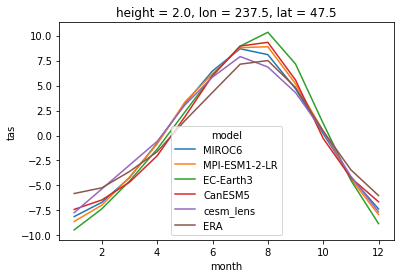

In [104]:
anom.sel(lat=lat, lon=lon, method='nearest').plot(hue='model');

In [105]:
anom.model.values

array(['MIROC6', 'MPI-ESM1-2-LR', 'EC-Earth3', 'CanESM5', 'cesm_lens',
       'ERA'], dtype='<U13')

In [124]:
rmse = anom.sel(model=['MIROC6', 'MPI-ESM1-2-LR', 'EC-Earth3', 'CanESM5', 'cesm_lens']) - anom.sel(model='ERA')
rmse = np.sqrt((rmse**2).mean('month'))
# rmse = np.abs(rmse).mean('month')

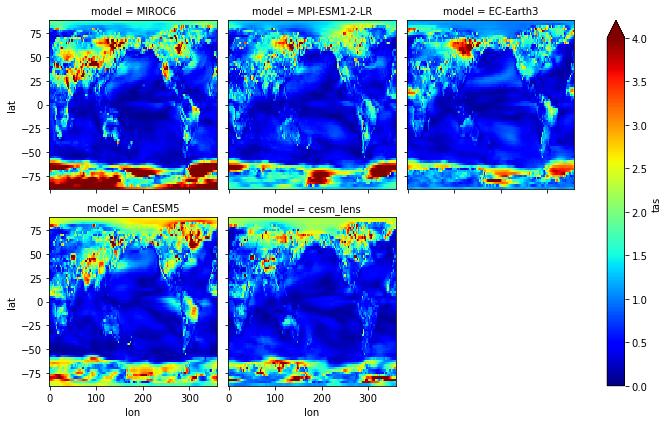

In [125]:
rmse.plot(col='model', col_wrap=3, cmap='jet', vmin=0, vmax=4)

In [126]:
cycle_weights = 1 / rmse
cycle_weights = cycle_weights / cycle_weights.mean('model')

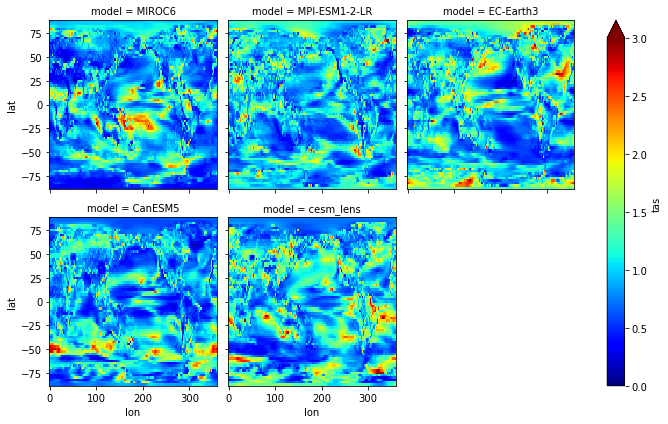

In [127]:
cycle_weights.plot(col='model', col_wrap=3, cmap='jet', vmin=0, vmax=3)

In [128]:
cycle_weights.mean(('lat', 'lon'))

<xarray.DataArray 'tas' (model: 5)>
array([0.92858074, 0.99230564, 1.06984082, 0.94651357, 1.06275922])
Coordinates:
    height   float64 2.0
  * model    (model) <U13 'MIROC6' 'MPI-ESM1-2-LR' ... 'CanESM5' 'cesm_lens'

In [129]:
cycle_weights.to_netcdf('cycle_weights.nc')

In [137]:
w = weights.sel(model=['MIROC6', 'MPI-ESM1-2-LR', 'EC-Earth3', 'CanESM5', 'cesm_lens'])
w = w / w.mean('model')

In [140]:
combined = w * cycle_weights

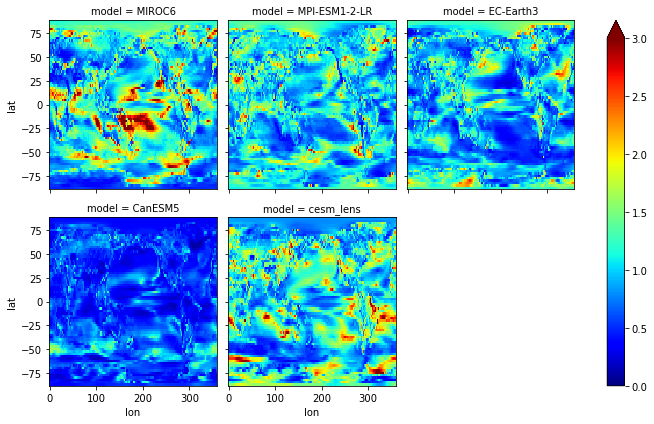

In [142]:
combined.plot(col='model', col_wrap=3, cmap='jet', vmin=0, vmax=3)

In [147]:
combined.to_netcdf('combined_weights.nc')

In [145]:
combined.sel(lat=[47], lon=[237], method='nearest')

<xarray.DataArray (model: 5, lat: 1, lon: 1)>
array([[[1.33849218]],

       [[0.98422163]],

       [[0.61597571]],

       [[0.6771825 ]],

       [[1.37673972]]])
Coordinates:
    degree   int64 1
  * model    (model) object 'MIROC6' 'MPI-ESM1-2-LR' ... 'CanESM5' 'cesm_lens'
    height   float64 2.0
  * lon      (lon) float64 237.5
  * lat      (lat) float64 47.5

In [150]:
test = combined.where(combined.model!='CanESM5', 0)

In [151]:
test.to_netcdf('no_canesm_weights.nc')